In [1]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

#Ordinary Least Squared function
def ols(x, y, z, degree = 5):
    #x: vector of size(n, 1)
    #y: vector of size(n,1)
    # z: vector of size(n,1)
    xyb_ = np.c_[x, y]
    poly = PolynomialFeatures(degree)
    xyb = poly.fit_transform(xyb_)
    beta = np.linalg.inv(xyb.T.dot(xyb)).dot(xyb.T).dot(z)

    return beta

In [2]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

"""
    Linear regression using the Ridge method
"""

def RidgeRegression(x, y, z, degree=5, l=0.0001):
    """
    :param x: numpy vector of size (n, 1)
    :param y: numpy vector of size (n, 1)
    :param degree: degree of polynomial fit
    :param l: Ridge penalty coefficient
    :return: numpy array with the beta coefficients
    """
    # Calculate matrix with x, y - polynomials
    M_ = np.c_[x, y]
    poly = PolynomialFeatures(degree)
    M = poly.fit_transform(M_)



    # Calculate beta
    A = np.arange(1, degree + 2)
    rows = np.sum(A)
    beta = (np.linalg.inv(M.T.dot(M) + l * np.identity(rows))).dot(M.T).dot(z)

    return beta


In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import numpy as np

def Lasso(x, y, z, degree=5, a=1e-06):

    X = np.c_[x, y]
    poly = PolynomialFeatures(degree=degree)
    X_ = poly.fit_transform(X)

    clf = linear_model.Lasso(alpha=a, max_iter=5000, fit_intercept=False)
    clf.fit(X_, z)
    beta = clf.coef_

    return beta

In [4]:
import numpy as np
from sklearn.utils import resample
import matplotlib.pyplot as plt

def bootstrap(x, y, z, p_degree, method, n_bootstrap=100):
    # Randomly shuffle data
    data_set = np.c_[x, y, z]
    np.random.shuffle(data_set)
    set_size = round(len(x)/5)

    # Extract test-set, never used in training. About 1/5 of total data
    x_test = data_set[0:set_size, 0]
    y_test = data_set[0:set_size, 1]
    z_test = data_set[0:set_size, 2]
    test_indices = np.linspace(0, set_size-1, set_size)

    # And define the training set as the rest of the data
    x_train = np.delete(data_set[:, 0], test_indices)
    y_train = np.delete(data_set[:, 1], test_indices)
    z_train = np.delete(data_set[:, 2], test_indices)

    Z_predict = []

    MSE = []
    R2s = []
    for i in range(n_bootstrap):
        x_, y_, z_ = resample(x_train, y_train, z_train)

        if method == 'Ridge':
            # Ridge regression, save beta values
            beta = RidgeRegression(x_, y_, z_, degree=p_degree)
        elif method == 'Lasso':
            beta = Lasso(x_, y_, z_, degree=p_degree)
        elif method == 'OLS':
            beta = ols(x_, y_, z_, degree=p_degree)
        else:
            print('ERROR: Cannot recognize method')
            return 0

        M_ = np.c_[x_test, y_test]
        poly = PolynomialFeatures(p_degree)
        M = poly.fit_transform(M_)
        z_hat = M.dot(beta)

        Z_predict.append(z_hat)

        # Calculate MSE
        MSE.append(np.mean((z_test - z_hat)**2))
        R2s.append(R2(z_test, z_hat))
        print('Round: ', i)

    # Calculate MSE, Bias and Variance
    MSE_M = np.mean(MSE)
    R2_M = np.mean(R2s)
    bias = np.mean((z_test - np.mean(Z_predict, axis=0, keepdims=True))**2)
    variance = np.mean(np.var(Z_predict, axis=0, keepdims=True))
    return MSE_M, R2_M, bias, variance

In [5]:
def R2(zReal, zPredicted):
    """
    :param zReal: actual z-values, size (n, 1)
    :param zPredicted: predicted z-values, size (n, 1)
    :return: R2-score
    """
    meanValue = np.mean(zReal)
    numerator = np.sum((zReal - zPredicted)**2)
    denominator = np.sum((zReal - meanValue)**2)
    result = 1 - (numerator/denominator)
    return result

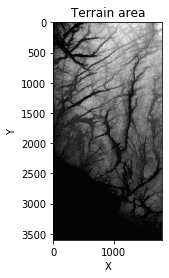

In [14]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt

# Load the terrain
terrain1 = imread('SRTM_data_Norway_2.tif')
# Show the terrain
plt.figure()
plt.title('Terrain area')
plt.imshow(terrain1, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

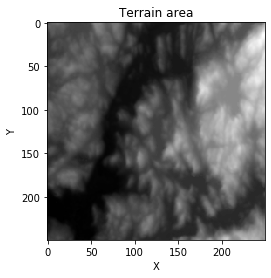

In [15]:
# Choose a smaller part of the data set
terrain = terrain1[1500:1750, 0:250]
# Show the terrain
plt.figure()
plt.title('Terrain area')
plt.imshow(terrain, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [16]:
# Make zero matrix to later fit data
num_rows, num_cols = np.shape(terrain)
num_observations = num_rows * num_cols
X = np.zeros((num_observations, 3))

In [21]:
# make a matrix with all the values from the data on the form [x y z]
index = 0
#X = X-np.mean(X)
for i in range(0, num_rows):
    for j in range(0, num_cols):
        X[index, 0] = i  # x
        X[index, 1] = j  # y
        X[index, 2] = terrain[i, j]  # z
        index += 1

In [22]:
# OLS example
# extract x, y, z
xt = X[:,0, np.newaxis]
yt = X[:,1, np.newaxis]
zt = X[:,2, np.newaxis]

In [23]:
# Try the OLS-method with degree=d
d = 8
beta = ols(xt, yt, zt, degree=d)

M_ = np.c_[xt, yt]
poly = PolynomialFeatures(d)
M = poly.fit_transform(M_)
z_predict = M.dot(beta)

T = np.zeros([num_rows, num_cols])
index = 0

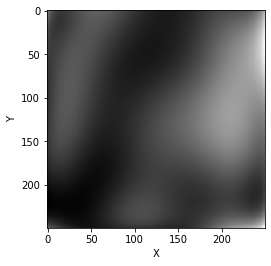

In [24]:
# create matrix for imshow
for i in range(0, num_rows):
    for j in range(0, num_cols):
        T[i, j] = (z_predict[index])
        index += 1
plt.figure()
plt.imshow(T, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

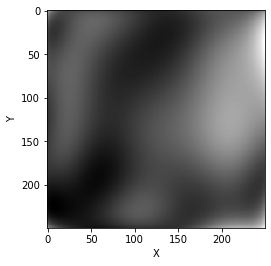

In [40]:
# Try the OLS-method with degree=d
d = 9
beta = ols(xt, yt, zt, degree=d)

M_ = np.c_[xt, yt]
poly = PolynomialFeatures(d)
M = poly.fit_transform(M_)
z_predict = M.dot(beta)

T = np.zeros([num_rows, num_cols])
index = 0
# create matrix for imshow
for i in range(0, num_rows):
    for j in range(0, num_cols):
        T[i, j] = (z_predict[index])
        index += 1
plt.figure()
plt.imshow(T, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [14]:
# Evaluate model with bootstrap algorithm
MSE, R2, bias, variance = bootstrap(xt, yt, zt, p_degree=d, method='OLS', n_bootstrap=10)
print('{0:5f} & {1:5f} & {2:5f} & {3:5f}'.format(MSE, R2, bias, variance))

C:\Users\bod\anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
C:\Users\bod\anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
C:\Users\bod\anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


Round:  0
Round:  1
Round:  2
Round:  3
Round:  4
Round:  5
Round:  6
Round:  7
Round:  8
Round:  9
502.190040 & 0.884288 & 501.700685 & 0.489355


In [33]:
# Try the ridge-method with degree=d, l = 0.0001
d = 8
#l = 0.0001
beta_ridge = RidgeRegression(xt, yt, zt, degree=d)

M_ = np.c_[xt, yt]
poly = PolynomialFeatures(d)
M = poly.fit_transform(M_)
z_predict = M.dot(beta_ridge)

T = np.zeros([num_rows, num_cols])
index = 0

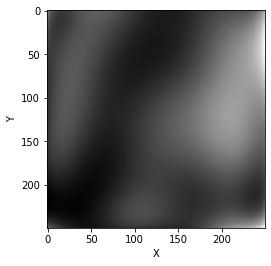

In [34]:
# create matrix for imshow
for i in range(0, num_rows):
    for j in range(0, num_cols):
        T[i, j] = (z_predict[index])
        index += 1
plt.figure()
plt.imshow(T, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [35]:
beta.shape

(45, 1)

In [36]:
beta_ridge.shape

(45, 1)